In [17]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import math
import random
from matplotlib import pyplot as plt
from scipy.spatial import distance
filename = "datasets/LR/1.txt"

In [4]:
val = pd.read_csv(filename, nrows=2, header=None)
NPARAMS = val[0][0]
NTRAIN = val[0][1]
dataset = pd.read_csv(filename, sep=' ', skiprows=2, nrows=NTRAIN-1, header=None)
pd.DataFrame(dataset.values)

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,861813,-109689,-501867,299787,2720,-596749,95961,-43490,451227,994130,...,-947883,1065965,213248,1469971,-213545,2727628,6259280,-1042685,-138552,-6219662
1,734897,-109701,-501867,299787,2720,-596756,95864,46535,451227,994130,...,-111284,1065965,226791,1471724,-210350,2693318,6219628,-1042685,-138631,-4472740
2,893009,-109653,-501867,299787,2720,-596728,96258,-65515,451227,994130,...,-913285,1065965,195846,1490651,-175851,2704943,6223772,-1042685,-139484,-4250292
3,898311,-109683,-501867,299787,2720,-596745,96013,-69651,451227,994130,...,-1185096,1065965,183087,1508697,-142958,2759332,6305891,-1042685,-140297,-4055391
4,423466,-109710,-501867,299787,2720,-596761,95793,267483,451227,994130,...,-1579790,1065965,249500,1491797,-173762,2592164,6097935,-1042685,-139536,-3929017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,-783885,-109641,-501867,299787,2720,-596721,96362,1123176,451227,994130,...,1893436,1065965,187326,1794211,377456,2208200,5652754,-1042685,-153163,28524713
1159,-1140045,-109666,-501867,299787,2720,-596736,96152,1376080,451227,994130,...,2213450,1065965,244103,1771122,335372,2083500,5497137,-1042685,-152122,28728629
1160,-1527101,-109679,-501867,299787,2720,-596743,96048,1650786,451227,994130,...,1275907,1065965,283033,1780077,351694,1949769,5332871,-1042685,-152526,29616679
1161,-1280786,-109702,-501867,299787,2720,-596757,95856,1475536,451227,994130,...,2233996,1065965,241648,1799090,386350,2093540,5526842,-1042685,-153383,30608872


In [5]:
test_dataset = pd.read_csv(filename, sep=' ', skiprows=3+NTRAIN, header=None)
NTEST = len(test_dataset)
pd.DataFrame(test_dataset.values)

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,-213410,-109667,-501867,299787,2720,-596736,96145,719579,451227,994130,...,-644531,1065965,276460,1562109,-45602,2322553,5756964,-1042685,-142704,6080887
1,-533970,-109671,-501867,299787,2720,-596738,96115,946796,451227,994130,...,977058,1065965,277545,1616070,52753,2233148,5655865,-1042685,-145136,13552510
2,-733427,-109690,-501867,299787,2720,-596750,95954,1087906,451227,994130,...,1039057,1065965,266441,1667183,145919,2212326,5646204,-1042685,-147439,17638943
3,-250862,-109705,-501867,299787,2720,-596758,95836,745704,451227,994130,...,-201972,1065965,265026,1585569,-2841,2373625,5838374,-1042685,-143761,7742576
4,-442390,-109682,-501867,299787,2720,-596745,96023,881138,451227,994130,...,1063974,1065965,219380,1687008,182054,2331963,5799991,-1042685,-148332,17711406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-50290,-109679,-501867,299787,2720,-596743,96043,602522,451227,994130,...,1461331,1065965,157743,1711055,225885,2503093,6021912,-1042685,-149416,17999524
252,-54201,-109665,-501867,299787,2720,-596735,96166,605603,451227,994130,...,861698,1065965,174845,1686240,180654,2464992,5963628,-1042685,-148297,15783233
253,-877957,-109658,-501867,299787,2720,-596731,96219,1190965,451227,994130,...,486251,1065965,298052,1645138,105736,2095741,5483434,-1042685,-146445,16704809
254,53396,-109673,-501867,299787,2720,-596740,96096,529691,451227,994130,...,297146,1065965,212943,1610667,42906,2470527,5957241,-1042685,-144892,9247809


In [6]:
print(NPARAMS)
print(NTRAIN)
print(NTEST)

428
1164
256


In [7]:
F = np.array(dataset)[:,:-1]
Y = np.array(dataset)[:,-1]
teta = np.matmul(LA.pinv(F), Y)

In [8]:
def RS(X, Y, tau):
    return LA.pinv(np.add(X.T.dot(X), np.cov(X.T).dot(tau) )).dot(X.T).dot(Y)

In [9]:
def RSS(F, Y, sig):
    tau = 1 / sig
    teta = RS(F, Y, tau)
    return LA.norm(F.dot(teta) - Y) ** 2 + (0.5 * LA.norm(teta) ** 2) / sig 

In [30]:
best = 99999999999999
best_sig = 0
for s in range(991800, 992000, 10):
    res = RSS(F, Y, s)
    if res < best:
        best = res
        best_sig = s

In [31]:
print(best)
print(best_sig)

13476655976.11795
991860


In [10]:
def nrmse(actual, predicted):
    mse = np.mean(np.square(actual - predicted))
    return np.sqrt(mse) / (actual.max() - actual.min())

In [11]:
def estimate(ds):
    pred = ds.values[::,:-1:]@teta
    return nrmse(pred, ds.values.T[-1])

In [12]:
print("NRMSE for LS method on train dataset: %s" % estimate(dataset))
print("NRMSE for LS method on test dataset: %s" % estimate(test_dataset))

NRMSE for LS method on train dataset: 7.864915628152319e-05
NRMSE for LS method on test dataset: 6.177472061442368e-05


In [155]:
def L(predict, real):
    return (predict - real) ** 2


def L_der(predict, real):
    return 2 * (predict - real)

In [156]:
def init_w(n_param):
    random.seed()
    return [random.uniform(-1/(2*n_param), 1/(2*n_param)) for i in range(n_param)]

In [157]:
def init_q(X, Y, w):
    Q = 0
    for i in range(len(X)):
        Q += L(scalar_product(X[i], w), Y[i])
    return Q / len(X)

In [158]:
def scalar_product(a, b):
    result = 0
    for i in range(len(a)):
            result += a[i] * b[i]
    return result

In [210]:
def SGD(X, Y, tau, iterations_limit=2000, with_Q_limit=True):
    objects, features = len(X), len(X[0])
    w = init_w(features)
    Q = init_q(X, Y, w)
    iterations = 0
    while True:
        iterations += 1
        k = random.randint(0, objects - 1)
        x, y = X[k], Y[k]
        predict = scalar_product(x, w)
        loss = L(predict, y) + 0.5 * tau * np.linalg.norm(w)
        learning_rate = 0.009 / iterations
        for i in range(features):
            gradient = L_der(predict, y) * x[i]
            w[i] = w[i] * (1 - learning_rate * tau) - learning_rate * gradient
        decay = 0.1
        Q_previous = Q
        Q = (1 - decay) * Q + decay * loss
        if iterations == iterations_limit or (abs(Q - Q_previous) < 0.000001 and with_Q_limit):
            break
        #print(w)
    return w

In [260]:
def draw_graph(x_values, y_values, x_name, y_name):
    plt.plot(x_values, y_values, 'b')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xscale('log')
    plt.show()

In [258]:
def visual(dataset, I=25):
    vals = []
    for iter in range(I):
        W = SGD(dataset.values[::,:-1:], dataset.values.T[-1], 0.0000010082, 25, False)
        vals.append( nrmse(dataset.values.T[-1], dataset.values[::,:-1:]@(np.array(W)*10e-200)) )
    draw_graph(list(range(I)), vals, "iterations", "nrmse")

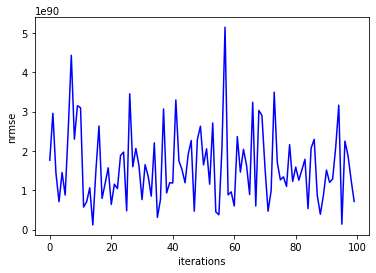

In [261]:
visual(dataset / 2, 100)

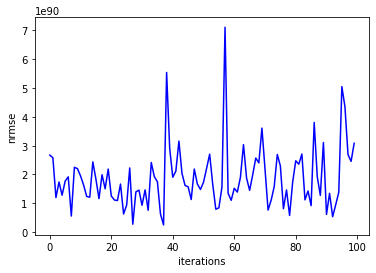

In [262]:
visual(test_dataset / 2, 100)